In [11]:
import plot_utils
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cmo

%matplotlib notebook


<IPython.core.display.Javascript object>


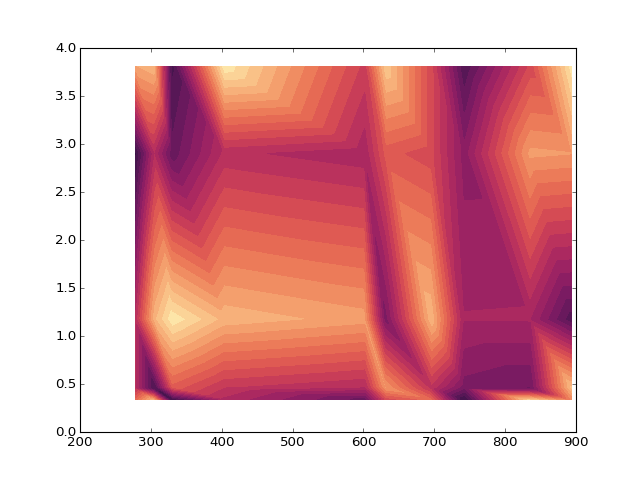

In [19]:
# Gridded, complete, but unevenly spaced, data.

# fabricate unevenly spaced, monotonic x variable
x=np.sort(1000*np.random.random(10))
# same for z variable
z=np.sort(5*np.random.random(5))
scalar=np.random.random( (len(x),len(z)) )

transect_data = xr.DataArray(scalar,
                             coords=[ ('x',x),
                                      ('z',z)])

fig,ax=plt.subplots()
coll=plot_utils.transect_tricontourf(transect_data,ax=ax,V=20,
                                     cmap=cmo.matter,
                                     xcoord='x',
                                     ycoord='z')

<IPython.core.display.Javascript object>


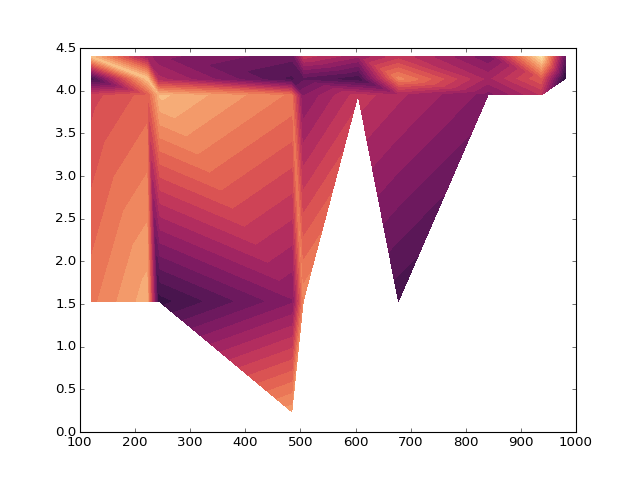

In [28]:
# Gridded, incomplete, unevenly spaced, data.
# Have to specify the limits of the contours now.

# fabricate unevenly spaced, monotonic x variable
x=np.sort(1000*np.random.random(10))
# same for z variable
z=np.sort(5*np.random.random(5))
scalar=np.random.random( (len(x),len(z)) )
# Randomly drop about 20% of the bottom of each profile
mask = np.sort(np.random.random( (10,5) ),axis=1) < 0.2
scalar[mask]=np.nan
# scalar=np.ma.masked_array(scalar,mask=mask) # equivalent


transect_data = xr.DataArray(scalar,
                             coords=[ ('x',x),
                                      ('z',z)])

fig,ax=plt.subplots()
coll=plot_utils.transect_tricontourf(transect_data,ax=ax,V=np.linspace(0,1,20),
                                     cmap=cmo.matter,
                                     xcoord='x',
                                     ycoord='z')


In [36]:
transect_data

<xarray.DataArray 'scalar' (x: 10, z: 5)>
array([[ 0.18083696,  0.25142982,  0.25379338,  0.59473209,  0.76447578],
       [        nan,         nan,  0.84673869,  0.48306905,  0.04247604],
       [        nan,  0.62278989,  0.29762332,  0.38798422,  0.3909906 ],
       [        nan,  0.37000942,  0.37183985,  0.90637744,  0.48040211],
       [        nan,         nan,  0.63181166,  0.73294676,  0.27300259],
       [        nan,  0.88940886,  0.24746671,  0.11267973,  0.27042377],
       [ 0.36930178,  0.0927908 ,  0.08837482,  0.04330237,  0.46096662],
       [        nan,         nan,  0.20814737,  0.72020642,  0.02517602],
       [ 0.43394539,  0.61231383,  0.71663714,  0.81171674,  0.97861479],
       [        nan,  0.86236865,  0.86388528,  0.78309185,  0.26426532]])
Coordinates:
  * x        (x) float64 221.8 350.1 353.1 658.4 659.5 689.3 718.2 732.0 ...
    cast_z   (x, z) float64 0.818 1.48 2.4 2.702 4.489 2.523 3.281 3.446 ...
  * z        (z) int64 0 1 2 3 4

<IPython.core.display.Javascript object>


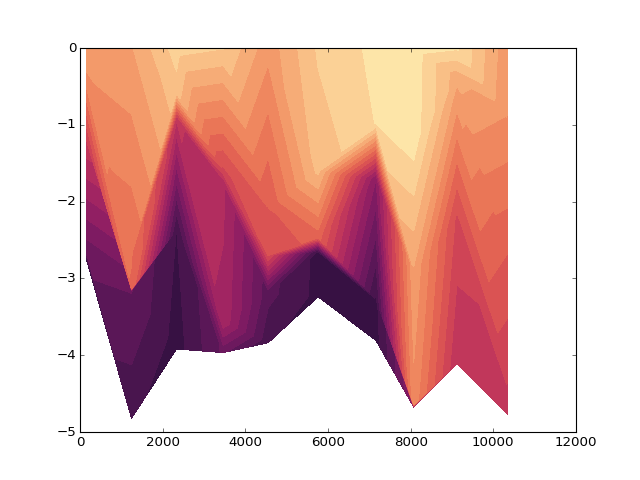

In [45]:
# One x per profile, but z is not regular (each profile has an independent
# z axis)

# fabricate unevenly spaced, monotonic x variable
x=np.linspace(0,10000,10)  + 500*np.random.random(10)
# vertical coordinate is now a 2D variable, ~ (cast,sample)
cast_z=np.sort(-5*np.random.random((10,5)),axis=1)
cast_z[:,-1]=0
scalar=np.sort( np.random.random( cast_z.shape),axis=1)
# Randomly drop about 20% of the bottom of each profile
#mask = np.sort(np.random.random( (10,5) ),axis=1) < 0.2
#scalar[mask]=np.nan
# scalar=np.ma.masked_array(scalar,mask=mask) # equivalent

ds=xr.Dataset()
ds['x']=('x',x)
ds['cast_z']=( ('x','z'),cast_z)
ds['scalar']=( ('x','z'), scalar )
ds=ds.set_coords( ['x','cast_z'])
transect_data = ds['scalar']

fig,ax=plt.subplots()
coll=plot_utils.transect_tricontourf(transect_data,ax=ax,V=np.linspace(0,1,20),
                                     cmap=cmo.matter_r,
                                     xcoord='x',
                                     ycoord='cast_z')


<IPython.core.display.Javascript object>


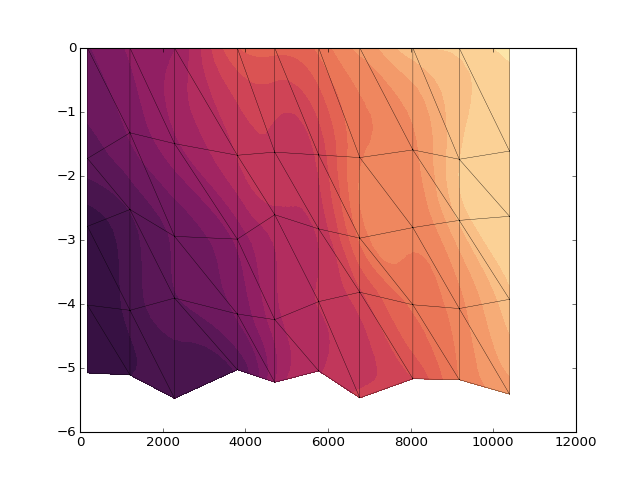

In [67]:
# One x per profile, but z is not regular (each profile has an independent
# z axis).
# Use the triangulation directly, and try a higher-order contouring

# fabricate unevenly spaced, monotonic x variable
x=np.linspace(0,10000,10)  + 500*np.random.random(10)
# vertical coordinate is now a 2D variable, ~ (cast,sample)
cast_z=np.linspace(0,1,5)[None,:] + 0.1*np.random.random((10,5))
cast_z=np.sort(-5*cast_z,axis=1)
cast_z[:,-1]=0
scalar=np.sort(np.sort(np.random.random( cast_z.shape),axis=0),axis=1)


ds=xr.Dataset()
ds['x']=('x',x)
ds['cast_z']=( ('x','z'),cast_z)
ds['scalar']=( ('x','z'), scalar )
ds=ds.set_coords( ['x','cast_z'])
transect_data = ds['scalar']

fig,ax=plt.subplots()

tri,mapper=plot_utils.transect_to_triangles(transect_data,xcoord='x',ycoord='cast_z')

if 1:
    ax.tricontourf(tri,mapper(transect_data.values),np.linspace(0,1,20),
                   cmap=cmo.matter_r)
    # Show how the interpolation is constructed:
    ax.triplot(tri,color='k',lw=0.3)
if 1: 
    # This only works with relatively smooth data!
    import matplotlib.tri as mtri
    refiner = mtri.UniformTriRefiner(tri)
    tri_refi, z_refi = refiner.refine_field(mapper(transect_data.values), subdiv=3)
    plt.tricontourf(tri_refi, z_refi, 
                    levels=np.linspace(0,1,20), cmap=cmo.matter_r)    

In [55]:
z_refi.min()

-14.502179703105075